In [1]:
import os
os.getcwd()

'/Users/rabeya/DIGHUM101-2019-master_week4/Week4'

In [2]:
# Imports that we need 

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import * 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Project: Analyzing Characteristic Words in Music Reviews from MetaCritic

For my final project, I analyzed reviews of music genres from MetaCritic, to pose critical questions about the sentiments of these reviews: Why do certain genres receive negative distinctive words, and others don't? Which magazines are reviewing these?

Questions:

1. How does the language of magazine critiques change when reviewing different genres?
2. Does the TF-IDF on the Metacritic data show evidence of genre-based bias in the music criqtues?(e.g. positive words for jazz reviews, negative ones for rap reviews)
3. If so, can that be explained by the distribution of critics?
4. How might we interpret this in a larger cultural context of US and UK music media?
5. What lessons can we learn from this project about taking care to sample data fairly?

In [3]:
reviews = pd.read_csv("/Users/rabeya/DIGHUM101-2019-master_week4/Week4/data/music_reviews.csv", sep = "\t")
reviews.head(15)

,album,artist,genre,release_date,critic,score,body
0,Don't Panic,All Time Low,Pop/Rock,2012-10-09 00:00:00,Kerrang!,74.0,While For Baltimore proves they can still writ...
1,Fear and Saturday Night,Ryan Bingham,Country,2015-01-20 00:00:00,Uncut,70.0,There's nothing fake about the purgatorial nar...
2,The Way I'm Livin',Lee Ann Womack,Country,2014-09-23 00:00:00,Q Magazine,84.0,All life's disastrous lows are here on a caree...
3,Doris,Earl Sweatshirt,Rap,2013-08-20 00:00:00,Pitchfork,82.0,"With Doris, Odd Future’s Odysseus is finally b..."
4,Giraffe,Echoboy,Rock,2003-02-25 00:00:00,AllMusic,71.0,Though Giraffe is definitely Echoboy's most im...
5,Weathervanes,Freelance Whales,Indie,2010-04-13 00:00:00,Q Magazine,68.0,Fans of Owl City and The Postal Service will r...
6,Build a Rocket Boys!,Elbow,Pop/Rock,2011-04-12 00:00:00,Delusions of Adequacy,82.0,"Whereas previous Elbow records set a mood, Bui..."
7,Ambivalence Avenue,Bibio,Indie,2009-06-23 00:00:00,Q Magazine,78.0,His remarkable Warp debut follows a series of ...
8,Wavvves,Wavves,Indie,2009-03-17 00:00:00,PopMatters,68.0,"There’s an energy coursing through this, and r..."
9,Peachtree Road,Elton John,Rock,2004-11-09 00:00:00,MelD.,70.0,Classic. Songs filled with soul. Lyrics refres...


# Let's do some Exploratory Data Analysis on the data table

First, we will look at distribution of average scores based on genre, critic+genre, and a histogram of the number of reviews of critics. This will helps us determine what aspects of the data to analyze, e.g. genre alone, or critic+genre. Which critics are heavily biased?

Let's look at the distribution of critics.

AttributeError: 'Rectangle' object has no property 'size'

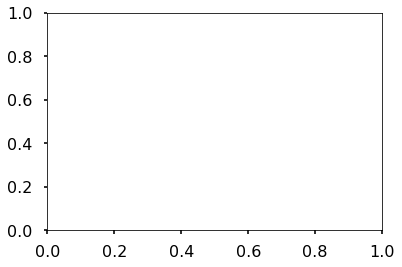

In [4]:
# Let's look at the distribution of critics.

# Plot a bar distribution of the critics
critic_freq = reviews['critic'].value_counts().head(20)
critic_freq.plot.barh(size=10)
plt.xlabel('Number of Reviews in Sample', fontsize=20)
plt.title('Top 25 Critics')

#plt.figure(figsize=(10,10))
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=30) 

In [ ]:
pd.Series.plot.barh??

In [ ]:
#Proportional bar plot
critic_freq.index
# make new series
total = sum(list(critic_freq.values))
prop_counts = [(c/total) for c in critic_freq.values]
critic_proportion = pd.Series(prop_counts, index=critic_freq.index)

#Plot
critic_proportion.plot.barh()
plt.xlabel('Proportion of Reviews in Sample')
plt.title('Top 25 Critics')

plt.rc('ytick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=30) 

Wow! So we can see that just a few critics contain a sizeable fraction of the reviews. This is almost an exponential distribution in nature. This could be analyzed as a example of the Pareto distribution occuring as frequency of reviews by the rank of the critic.

If certain critics (that have written many reviews) review genres (say rap) negatively, does that affect the overall sentiment of those reviews in a TF-IDF measurement?

In [ ]:
# View average score by genre
reviews_grouped_by_genre = reviews.groupby("genre")
#reviews_grouped_by_genre['score'].mean().sort_values(ascending=False)

In [ ]:
reviews_grouped_by_genre['score'].mean().plot.barh()

Let's group "reviews" dataframe by critic AND genre, and obtain average scores for each critic across genre. For example, what are average scores across genre for the critic "Q Magazine"? For "Rolling Stone"? How about "The A.V. Club"?

In [ ]:
reviews_grouped_by_critic_and_genre = reviews.groupby(['critic', 'genre'])
critic_and_genre_avg = reviews_grouped_by_critic_and_genre.mean()

In [ ]:
critic_and_genre_avg.head(15)

Let's do some graphing! We can graph, say the average score of Pop/Rock music across a variety of critics, now that we have a JOINT table of critics and genre (pandas groupby).



What we will do now, is a TF-IDF analysis of reviews, but remove stopwords and other unncessary info.

First, let's add a body_without_digits to "reviews" dataframe.

In [ ]:
# What is going on here?
def remove_digits(comment):
    return ''.join([ch for ch in comment if not ch.isdigit()])

reviews['body_without_digits'] = reviews['body'].apply(remove_digits)

# Data Analysis of Reviews: Part 1

Now, we will begin by using the TF-IDF algorithm to create a vocabulary of words.



Let's import the NLTK Library and use part-of-speech taggers to remove nouns (and proper nouns) from the reviews section. Since we are using TF-IDF scores, we probably don't need to remove stopwords.

One issue with our first analysis above is that we didn't lower-case-ify all the reviews, which we should do for uniformity.

We could also use a lemmatizer to make sure that Python doesn't treat different forms of the same word as different, but rather the same unique word.

In [5]:
import nltk 
from nltk import WordNetLemmatizer, SnowballStemmer, pos_tag, word_tokenize

import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

In [6]:
import string
from string import punctuation


In [7]:
# Hmm....maybe we can lemmatize the review now? Collect unique words (in order)?

# First we need to convert pos_tag tags to ones that can be used by the WordNet Lemmatizer as an argument.

# Here is some code below to do the conversion:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    elif treebank_tag.startswith('P'):
        return wordnet.NOUN
    else:
        return ''

Let's try this for every review.

In [8]:
from nltk.stem import WordNetLemmatizer
WNL = WordNetLemmatizer()

# First, define a function to take a review and lemmatize the words, and get unique output

def lemmatize_review(review):
    review = review.lower()
    lemmatized_review = []
    tags = pos_tag(word_tokenize(review))
    
    for pair in tags:
        wn_tag = get_wordnet_pos(pair[1])
        if wn_tag is not '':
            lemmed_word = WNL.lemmatize(pair[0], wn_tag)
            lemmatized_review.append(lemmed_word)
        else:
            lemmatized_review.append(pair[0])
            
    return ' '.join((lemmatized_review))

In [18]:
# First, we will remove any punctuation from body_without_digits and replace it back

def remove_punct(comment):
    return ''.join([ch for ch in comment if ch not in punctuation])

reviews['body_without_digits'] = reviews['body'].apply(remove_punct)

In [19]:
# Now let us apply lemmatize_review for each review in body_without_digits, and create a new column

reviews['body_lemmatized'] = reviews['body_without_digits'].apply(lemmatize_review)

In [20]:
# Let's quickly remove stopwords from the lemmatized reviews 

def remove_stopwords(text):
    list_text = []
    for word in word_tokenize(text):
        if word not in stopwords:
            list_text.append(word)
            
    return ' '.join(list_text)


reviews['body_lemmatized'] = reviews['body_lemmatized'].apply(remove_stopwords)

In [21]:
# Example reviews

print('Review 1 edited:')
print(reviews['body_lemmatized'][0])
print('\n\n')
print('Review 6 edited:')
print(reviews['body_lemmatized'][5])

Review 1 edited:
baltimore prof still write grade banger put mind many song destine must try harder stamp report card 13 oct 2012 p52



Review 6 edited:
fan owl city postal service relish good clean fun quite literally dadone warble dont let bathwater get high star oct 2010 p107


In [22]:
# New TF-IDF 

tfidfvec_remastered = TfidfVectorizer()
sparse_tfidf_remastered = tfidfvec_remastered.fit_transform(reviews['body_lemmatized'])

tfidf_remastered_df = pd.DataFrame(sparse_tfidf_remastered.toarray(), columns=tfidfvec_remastered.get_feature_names(), index=reviews.index)

tfidf_remastered_df['genre_'] = reviews['genre']
tfidf_remastered_df.head()

,00s,03,0390039,039avril,039backpacker039,039derivative039,039e,039every,039everyexcellent,039has,...,zomby,zone,zoo,zooey,zoomer,zu,álbum,überchill,überpopstar,genre_
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pop/Rock
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Country
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Country
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock


This TF-IDF analysis with the lemmatized reviews looks a bit more promising and discriminative of distinctive words based on genre, but it could do better. 

Let's perform a 2-gram TF-IDF analysis -- so we would use single words as well as phrases. We are constructing a class in the panel below to make the analysis easier.

In [23]:
# Let's write a class to make the TF-IDF analysis easier
# here, "data" = reviews (dataframe) and "feature" = 'body_lemmatized'

class TF_IDF:
    
    def __init__(self, ngrams, data, feature):
        self.vectorizer = TfidfVectorizer(ngram_range=ngrams)
        self.data = data
        self.text = data[feature]
        
    def analyze(self, genre_list):
        dataframe = pd.DataFrame(self.vectorizer.fit_transform(self.text).toarray(), 
                                 columns=self.vectorizer.get_feature_names(), 
                                 index=self.data.index)
        dataframe['genre_'] = self.data['genre'] 
        songs_df = []
        for g in genre_list:
            songs_df.append(dataframe[dataframe['genre_']==g])
        return (genre_list, songs_df)
            

In [24]:
all_genres = set(reviews['genre'])

In [25]:
# 1-gram and 2-gram TF-IDF 

bigram_tfidf = TF_IDF(ngrams=(1,2), data=reviews, feature='body_lemmatized')

genre_interest = ['Rap', 'Pop', 'Jazz', 'Dance', 'Rock']
genre_tables = bigram_tfidf.analyze(genre_interest)

In [26]:
rap = genre_tables[1][0]
rap.max(numeric_only=True).sort_values(ascending=False).head(20)

authenticamiable     1.000000
blank                0.678831
waste good           0.580141
musically diverse    0.540622
nice musically       0.540622
strong anything      0.530641
anything sermon      0.530641
sucker               0.523794
sucker punch         0.523794
pack neat            0.512265
neat touch           0.512265
tight                0.509092
good beat            0.507916
sermon               0.506259
mature eyes          0.504533
musically mature     0.504533
eyes                 0.504533
waste                0.497782
derivativeness       0.487010
quickly overwhelm    0.487010
dtype: float64

<blockquote> Lets do a 1-gram test and then sentiment-note the words 
# (to keep track of statistics of sentiment) </blockquote>

In [27]:
# Lets do a 1-gram test and then sentiment-note the words 
# (to keep track of statistics of sentiment)
unigram_tfidf = TF_IDF(ngrams=(1,1), data=reviews, feature='body_lemmatized')

genre_interest = ['Rap', 'Pop', 'Jazz', 'Dance', 'Rock']
genre_tables_unig = unigram_tfidf.analyze(genre_interest)

rap_unigram = genre_tables_unig[1][0]
rap_unigram.max(numeric_only=True).sort_values(ascending=False).head(20)


authenticamiable    1.000000
blank               0.899400
waste               0.781747
tight               0.771544
sermon              0.765969
awesomely           0.733717
sucker              0.726462
eyes                0.720105
lift                0.690525
neat                0.684767
derivativeness      0.671726
common              0.669486
beastie             0.644690
weve                0.634221
diverse             0.629906
nonconformist       0.629444
mastermind          0.628768
supreme             0.626216
impress             0.625112
thatll              0.619537
dtype: float64

In [28]:
genre_tables_unig.sh

(['Rap', 'Pop', 'Jazz', 'Dance', 'Rock'],
 [      00s   03  0390039  039avril  039backpacker039  039derivative039  039e  \
  3     0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  18    0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  24    0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  33    0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  42    0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  ...   ...  ...      ...       ...               ...               ...   ...   
  4958  0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  4960  0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  4964  0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  4991  0.0  0.0      0.0       0.0               0.0               0.0   0.0   
  4995  0.0  0.0      0.0       0.0               0.0              

In [29]:
rap_unigram

,00s,03,0390039,039avril,039backpacker039,039derivative039,039e,039every,039everyexcellent,039has,...,zomby,zone,zoo,zooey,zoomer,zu,álbum,überchill,überpopstar,genre_
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
4960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap
4991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rap


In [27]:
labels = []
for s in reviews['score']:
    if (0 <= s) and (s < 40):
        labels.append(-1)
    elif (40 <= s) and (s < 61):
        labels.append(0)
    elif (61 <= s) and (s <= 100):
        labels.append(1)
        
reviews['Sentiment'] = labels


In [28]:
reviews['Sentiment'][0:100]

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    0
97    1
98    1
99    1
Name: Sentiment, Length: 100, dtype: int64

In [182]:
rap_reviews = reviews[reviews['genre']=='Rap']

proportions = rap_reviews['Sentiment'].value_counts(normalize=True)

In [183]:
proportions

 1    0.840220
 0    0.157025
-1    0.002755
Name: Sentiment, dtype: float64

In [184]:
reviews['Sentiment'].value_counts(normalize=True)

 1    0.913017
 0    0.085383
-1    0.001600
Name: Sentiment, dtype: float64

In [33]:
# our sample statistic is p-neg = 0.0027
# we will pretend that the "Good" and "Average" values combine into "Other"
# for a binary value proportion test, we use the normal distribution 
import math
n = 363
std_error = math.sqrt(0.0016*(1-0.0016)/n)
z = (0.0027 - 0.0016)/std_error

In [35]:
# Since we want the one-tailed result of z being bigger than the test-statistic,
# we can just calculate (1 - scipy.stats.norm.cdf(z))

1 - stats.norm.cdf(z)

0.30001233745309885

In [37]:
jazz_reviews = reviews[reviews['genre']=='Jazz']
jazz_reviews['Sentiment'].value_counts(normalize=True)


1    1.0
Name: Sentiment, dtype: float64

In [38]:
genre

NameError: name 'genres' is not defined

In [ ]:
alt_reviews = reviews[reviews['genre']=='Jazz']
jazz_reviews['Sentiment'].value_counts(normalize=True)

# Conclusion: Discussion and Thoughts

To conclude I return to the questions posed at the start of this presentation:

How does the language of magazine critiques change when reviewing different genres?

1. Does the TF-IDF on the Metacritic data show evidence of genre-based bias in the music criqtues?(e.g. positive words for jazz reviews, negative ones for rap reviews)

It is well known that Rap/hip-hop has had issues with negative press, and the above TF-IDF scores reinforce this.

Our TF-IDF analysis on the critic, Spin Magazine for example (as done above), reveals some problems with finding distinctive words over the entire corpus. Specifically, it displays to the reality of overrepresenttion. According to our data, the top 100 of the 600 total critics account for almost 90% of the reviews, with these and many of them have much more negative words about rap music than other genres such as jazz. Filtering the top 100 out, however, reveals that amongst the bottom 500 critics, rap/hip-hop is talked about with slightly more positive language.

3. If so, can that be explained by the distribution of critics?

Most of the top 100 magazines listed above (AllMusic, Q Magazine, Rolling Stone, etc.) are managed and staffed by white people. Perhaps a lack of cultural diversity in these offices have distorted the tastes of their critics.

4. How might we interpret this in a larger cultural context of US and UK music media?

Rap is very popular (in 2017 it overtook rock as the most popular music genre), but popularity doesn't necessarily correlate with critic scores; many movies are popular and received box office commercial successes, but then fail to become critically acclaimed. 

But why is it that only commercially successful rap records are critiqued by the big mags, while niche and less commercially successful rock and jazz records are still given a platform of review? This skewed focus erases "harder street styles" and fails to comprehensively review the full spectrum of flows and artists that shape the genre. 

More, why is it that jazz is perferred by these critics over rap? Is race at play? Aren't both Jazz and Rap "black" genres? 

Short answer: Jazz, like yoga, is now white.
The genre as a whole has been accepted by mainstream media and critics, because of jazz revival by white artists, such as "Old-Style Jazz" which was introduced to the Netherlands in the 1950s. Interesting enough, in the early 20th Century, jazz was (when it was still black) was criticized notoriously poorly received by critics, while square-dancing, a genre that hasn't aged well, has received enthusiatically.

5. What lessons can we learn from this project about taking care to sample data fairly?

When we have sources of critique from magazines, or other types of information (e.g. job income, type, etc.) and we do a language analysis, we need to be careful not to overrepresent some sources and downsample others. Or, when we scrape the data from the web, we need to be critical of how language is distributed (are there many more negative reviews of a certain music-genre, or movie-genre IN THE SAMPLE that produces a heavy bias?).

From this we are reminded why sampling our data when doing TF-IDF analysis is so, so important. 
TF-IDF scores a word based on the frequency in the document, and the rarity of the word in the corpus. 





# Future Research

For future research, I would use a sentiment classifier (such as pre-trained ones in the NLTK Library) to dig deeper into why certain magazines have more types of sentiments for certain music genres, and whether that is correlated to the fraction of reviews of a magazine dedicated to the genre (e.g. % of rap reviews in a magazine).